In [8]:
import torch
from torchvision import transforms

import pandas as pd
from PIL import Image
import requests
import os
import matplotlib.pyplot as plt
import natsort
import math

In [9]:
image_transforms = { 
    'test': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])
}

In [10]:
index_to_class = {0: 'backpack', 1: 'bed', 2: 'chair', 3: 'couch', 4: 'laptop', 5: 'table'}
print (index_to_class)

{0: 'backpack', 1: 'bed', 2: 'chair', 3: 'couch', 4: 'laptop', 5: 'table'}


In [12]:
image_path = '/home/fadilrisdian/project/task5/domain/day1/Backpack0.jpg'

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transform = image_transforms['test']

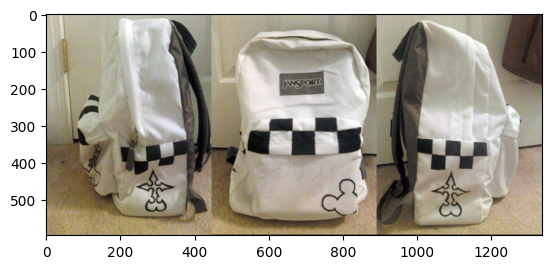

In [14]:
test_image = Image.open(image_path)
plt.imshow(test_image)

In [15]:
test_image_tensor = transform(test_image)
test_image_tensor = test_image_tensor.view(1, 3, 224, 224).to(device)

In [16]:
model = "model_res50.pt"
model = torch.load(model, map_location=torch.device('cuda:0'))

In [17]:
with torch.no_grad():
    model.eval()
    out = model(test_image_tensor)
    ps = torch.exp(out)
        
    topk, topclass = ps.topk(6, dim=1)

    simple_least_conf_1 = topk[0][0]
    simple_least_conf_2 = topk[0][1]
    num_labels = topk.numel()

    #least confidence
    normalized_least_conf = (1 - simple_least_conf_1) * (num_labels / (num_labels -1))

    #margin confidence
    difference = simple_least_conf_1 - simple_least_conf_2
    margin_confidence = 1 - difference

    #entropy
    log_probs = topk * torch.log2(topk)
    raw_entropy = 0 - torch.sum(log_probs) 

    normalized_entropy = raw_entropy / math.log2(topk.numel())

    normalized_least_conf = normalized_least_conf.item()
    margin_confidence = margin_confidence.item()
    normalized_entropy = normalized_entropy.item()

    # for i in range(6):
    #     # print(f"Prediction {i+1} : {index_to_class[topclass.cpu().numpy()[0][i]]}, Score: {topk.cpu().numpy()[0][i] * 100}%")
    #     print(f"Prediction {i+1} : {index_to_class[topclass.cpu().numpy()[0][i]]}, Score: {topk.cpu().numpy()[0][i] * 100}%")

In [32]:
_, predcitions = torch.max(topk, 1)

In [34]:
predcitions.item()

0

In [20]:
margin_confidence

0.0

In [21]:
normalized_least_conf

0.0

In [24]:
normalized_entropy

1.654265702200064e-07

In [22]:
# results_1 = []
# results_2 = []
# results_3 = []
# i = 0
# 
# for filename in natsort.natsorted(os.listdir(image_path)):
#     file = image_path + filename
#     print(file)
#     x = makePrediction(model, file)
#     results_1.append(x[0])
#     results_2.append(x[1])
#     results_3.append(x[2])

#     print(x)
#     print(i)
#     i += 1

In [23]:
df = pd.DataFrame(results_3)
df.to_csv('day1_entropy.csv',index=False)